In [2]:
import numpy as np
import pylab as plt
import networkx as nx
import pandas as pd

In [3]:
edge_list = [(0, 2), (0, 1), (0, 3), (2, 4), (5, 6), (7, 4), (0, 6), (5, 3), (3, 7), (0, 8)]

In [6]:
goal = 7

In [9]:
G = nx.Graph()
G.add_edges_from(edge_list)

In [10]:
position = nx.spring_layout(G)

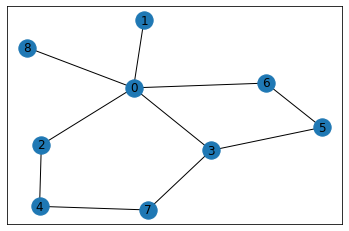

In [11]:
nx.draw_networkx_nodes(G, position)
nx.draw_networkx_edges(G, position)
nx.draw_networkx_labels(G, position)
plt.show()

In [12]:
SIZE_MATRIX = 9

In [16]:
R = np.matrix(np.ones(shape=(SIZE_MATRIX, SIZE_MATRIX)))
R *= -1

In [18]:
for edge in edge_list:
    print(edge)
    if edge[1] == goal:
        R[edge] = 100
    else:
        R[edge] = 0
    if edge[0] == goal:
        R[edge[::-1]] = 100
    else:
        R[edge[::-1]] = 0

(0, 2)
(0, 1)
(0, 3)
(2, 4)
(5, 6)
(7, 4)
(0, 6)
(5, 3)
(3, 7)
(0, 8)


In [20]:
R[goal, goal] = 100

In [21]:
R

matrix([[ -1.,   0.,   0.,   0.,  -1.,  -1.,   0.,  -1.,   0.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,   0.,   0.,  -1.,  -1., 100.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [22]:
gamma = 0.8

In [23]:
Q = np.matrix(np.zeros((SIZE_MATRIX, SIZE_MATRIX)))

In [24]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
def get_available_actions(state):
    current_state_row = R[state]
    available_actions = np.where(current_state_row >= 0)[1]
    
    return available_actions

In [27]:
def sample_next_action(available_actions):
    next_action = int(np.random.choice(available_actions, size=1))
    
    return next_action

In [28]:
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    print('max_index', max_index.shape)
    
    if max_index.shape[0] > 1: